# Exploring Customer Segmentation using K-Means Clustering

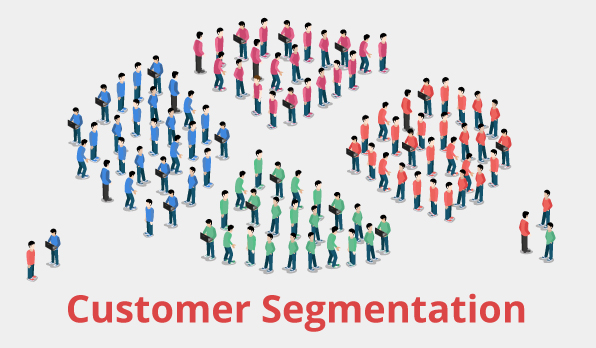

## Objective
In this assignment, we use the [Mall Customer Segmentation Data](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python) from Kaggle to perform K-Means clustering. The goal is to segment customers based on age, annual income, and spending score, gaining insights into customer behavior through effective data visualization. Additionally, we will optimize the clustering model for better performance.

____


## Tasks

1. **Dataset Overview:**
   - Briefly describe the chosen dataset, highlighting key features.
   
   _____


In [1]:
# Import necessary libraries

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
from sklearn.metrics import silhouette_score , make_scorer
from sklearn.model_selection import GridSearchCV

import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")


import missingno as msno

- Import Dataset 

In [2]:
df = pd.read_csv("Dataset/Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
#Remove unnecessary features 

df.drop("CustomerID" , axis=1 , inplace=True)

#Convert into dataframe 

df = pd.DataFrame(df)

In [4]:
#head 

df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [5]:
# df tail

df.tail()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18
199,Male,30,137,83


- Briefly describe the  dataset, highlighting key features.

In [6]:
#Shape

df.shape

(200, 4)

In [7]:
#data types 

df.dtypes.value_counts()

int64     3
object    1
Name: count, dtype: int64

In [8]:
#Columns 

df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [9]:
#Describe 

df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [10]:
#Value counts "Age" 
 

df["Age"].value_counts()

Age
32    11
35     9
19     8
31     8
30     7
49     7
40     6
38     6
47     6
27     6
36     6
23     6
34     5
20     5
29     5
50     5
48     5
21     5
24     4
18     4
28     4
67     4
59     4
54     4
43     3
60     3
45     3
39     3
33     3
37     3
22     3
25     3
46     3
68     3
52     2
44     2
66     2
57     2
26     2
53     2
42     2
63     2
70     2
51     2
58     2
65     2
41     2
55     1
69     1
64     1
56     1
Name: count, dtype: int64

- Feature encoding 

In [11]:
# Encode Male ->1 and Female -> 0

df['Gender'] = [1 if col=="Male" else 0 if col=="Female" else None for col in df["Gender"]]

2. **Data Exploration and Visualization:**
   - Conduct exploratory data analysis (EDA) using histograms, scatter plots,Correlation matrix ,  and pair plots.
   - Visualize feature distributions and potential correlations.
_____

- Conduct exploratory data analysis (EDA) :

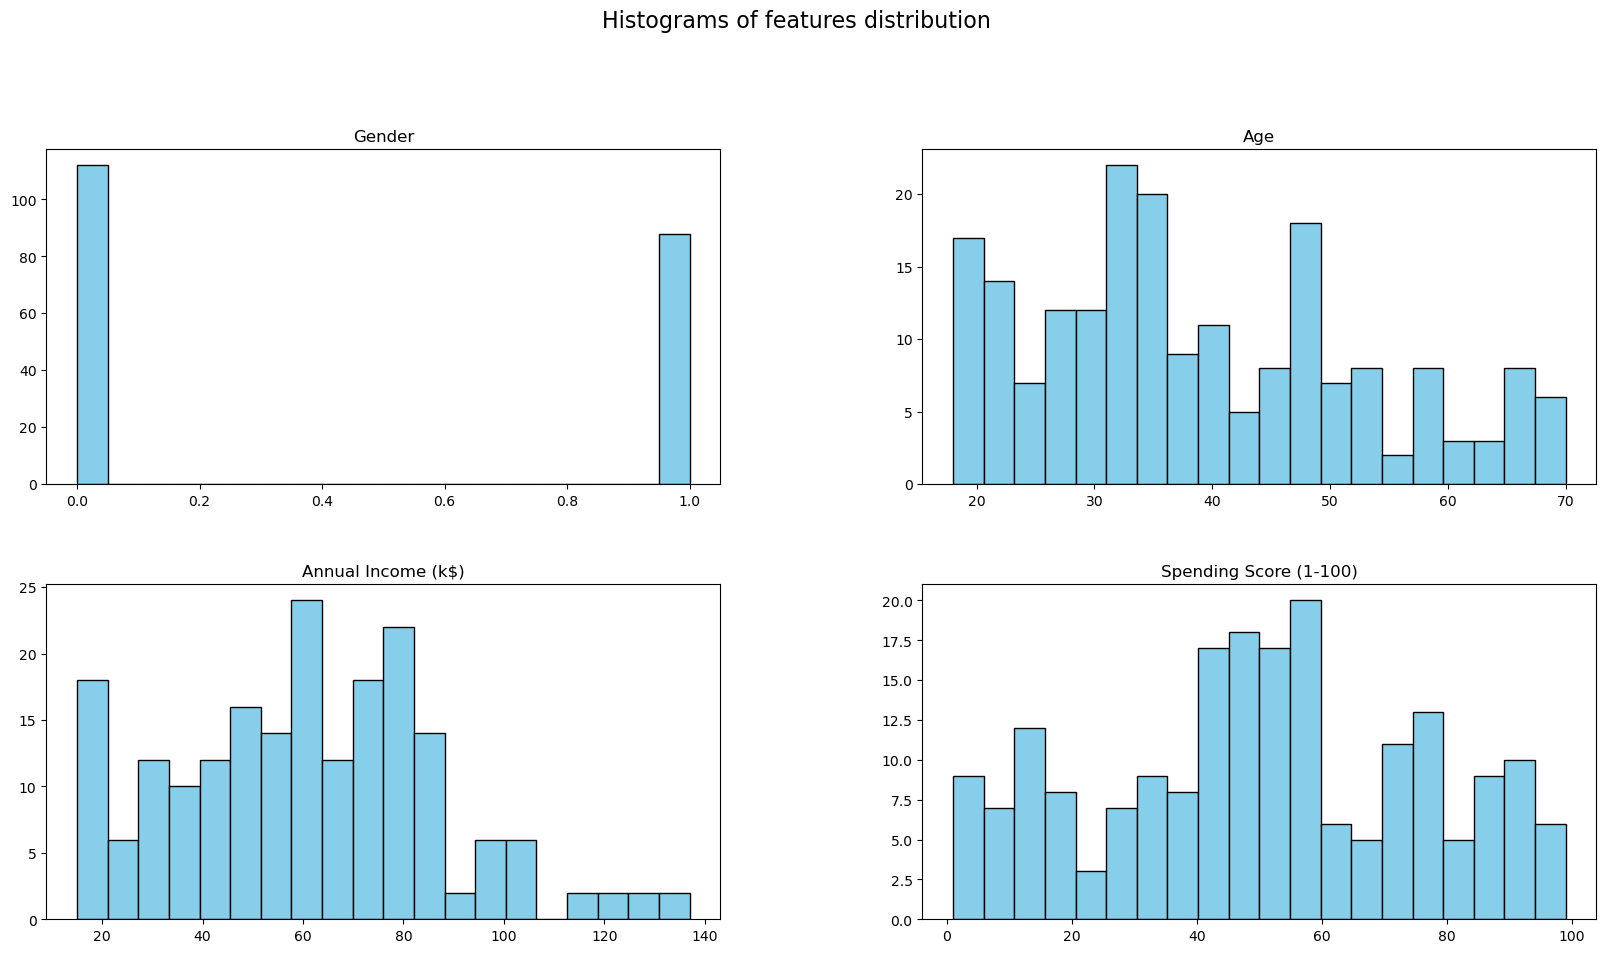

In [12]:
#Histograms


df.hist(figsize=(20, 10), bins=20, color='skyblue', edgecolor='black', grid=False)

# Title
plt.suptitle('Histograms of features distribution', fontsize=16, y=1.02)

# Display 
plt.show()


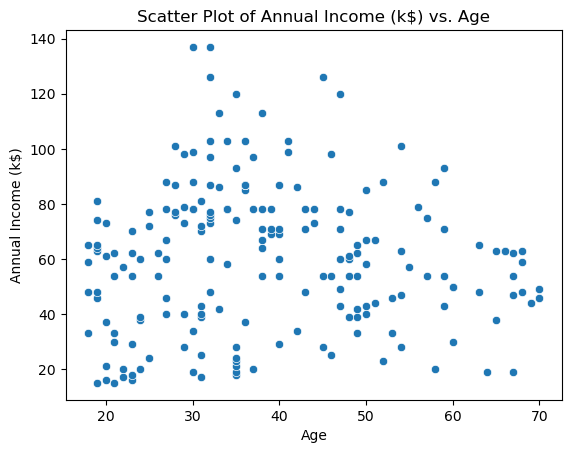

In [13]:
# 2. Scatter Plots

# Scatter Plot of Annual Income (k$) vs. Age
sns.scatterplot(x='Age', y='Annual Income (k$)', data=df)
plt.title('Scatter Plot of Annual Income (k$) vs. Age')
plt.show()

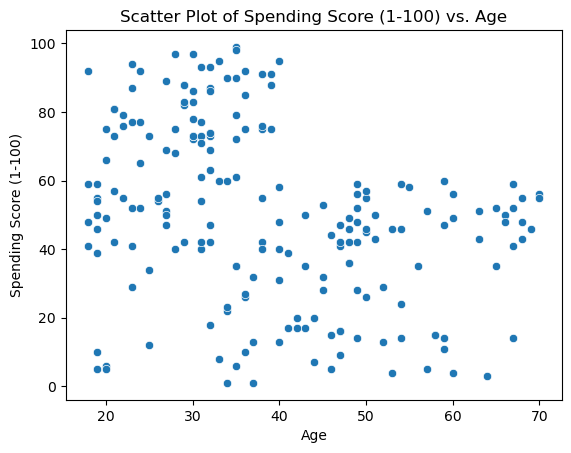

In [14]:
# 2. Scatter Plots

# Scatter Plot of Spending Score (1-100)' vs. Age
sns.scatterplot(x='Age', y='Spending Score (1-100)', data=df)
plt.title('Scatter Plot of Spending Score (1-100) vs. Age')
plt.show()

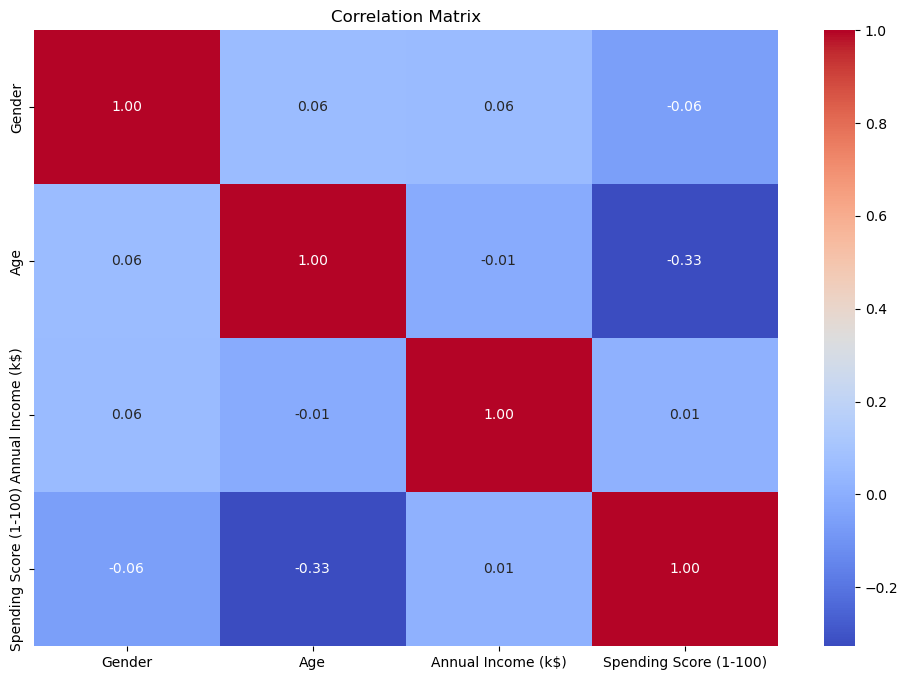

In [15]:
# 3. Correlation Matrix
correlation_matrix = df.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


3. **Data Preprocessing:**
   - Handle missing values and normalize relevant features.
    ____

 - Handle missing values

In [16]:
#Missing values 

df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

<Axes: >

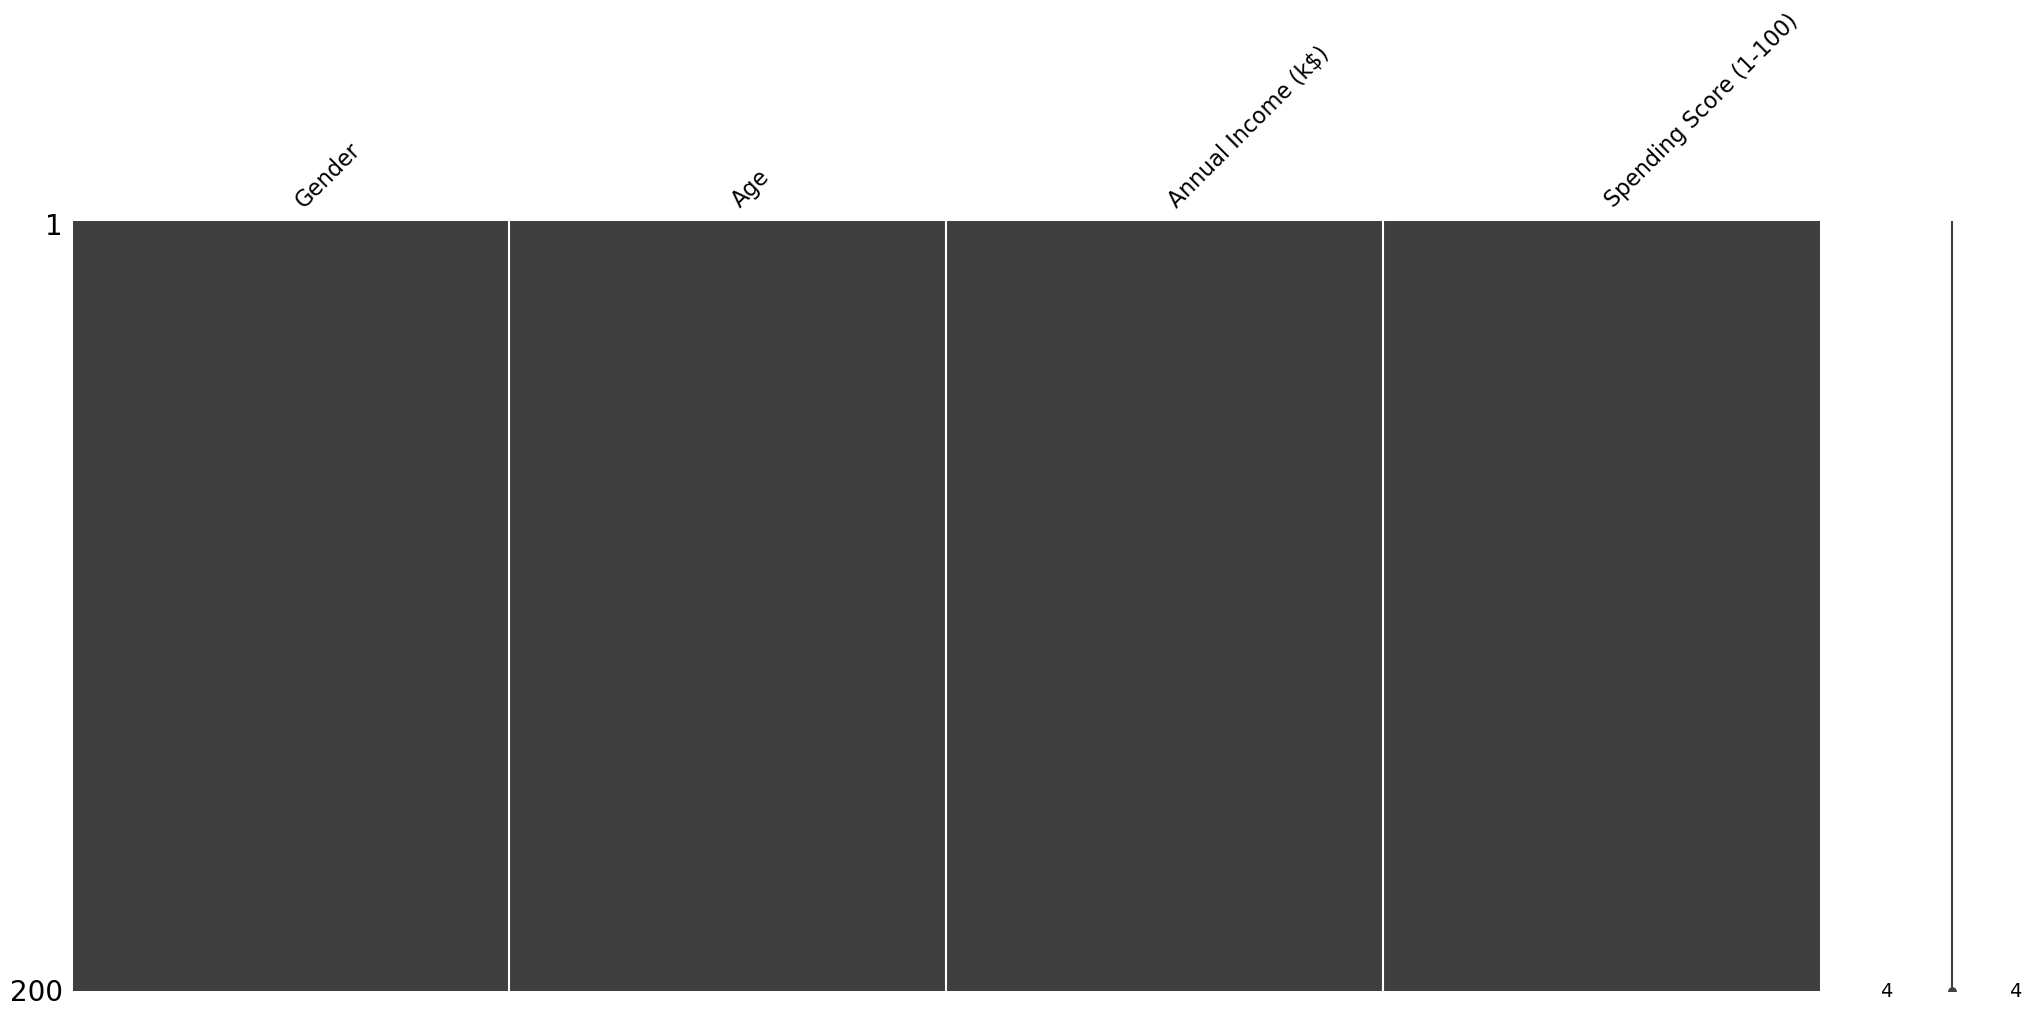

In [17]:
#Viz missing values 

msno.matrix(df)

# NO MISSING VALUES !!

In [18]:
#drop duplicated values 

df.drop_duplicates()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


- Feature selection for the model

In [62]:
#Considering only 2 features (Annual income and Spending Score)

X= df[['Annual Income (k$)','Spending Score (1-100)']]

- Normalize features

In [63]:
#Define scaler 

scaler = StandardScaler()

#fit and transform 

scaler_df = scaler.fit_transform(X)

#Convert into dataframe 

scaler_df = pd.DataFrame(scaler_df , columns=X.columns)

In [64]:
scaler_df

,Annual Income (k$),Spending Score (1-100)
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980
...,...,...
195,2.268791,1.118061
196,2.497807,-0.861839
197,2.497807,0.923953
198,2.917671,-1.250054


**4. K-Means Clustering:**
   - Apply K-Means clustering with different values of K.
   - Determine the optimal number of clusters using suitable metrics and Elbow method . Plot 

____

  - Determine the optimal number of clusters using suitable metrics and Elbow method .

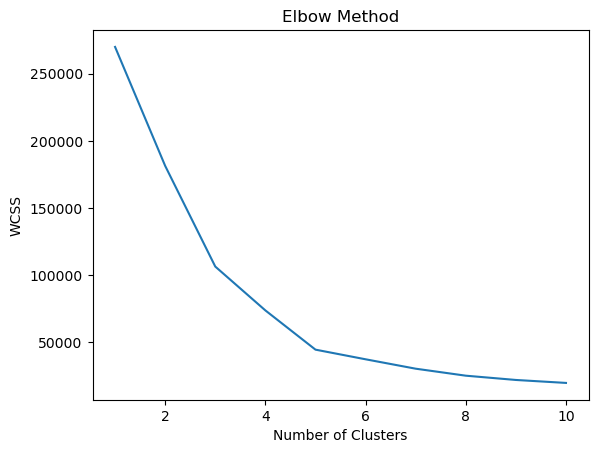

In [65]:
# Assuming X is your feature matrix
wcss = []

# Iterate over a range of cluster numbers
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')  # Within-Cluster Sum of Squares
plt.show()

### K = 5

5. **Model Optimization:**
   - Explore techniques for optimizing the K-Means clustering model.
   - Evaluate the impact of optimizations on clustering results.
    ____

 - Consider adjusting hyperparameters, such as the initialization method or convergence criteria.
   

- Apply K-Means clustering with the optimal parameters

In [66]:
# Define the model Kmean n_clusters = 5

kmeansmodel = KMeans(n_clusters=5, init='k-means++', random_state=0, n_init=10)
y_kmeans = kmeansmodel.fit_predict(X)

6. **Visualizing Clusters:**
   - Create effective visualizations, such as scatter plots and 3D scatter plots, to showcase cluster separation.
_____

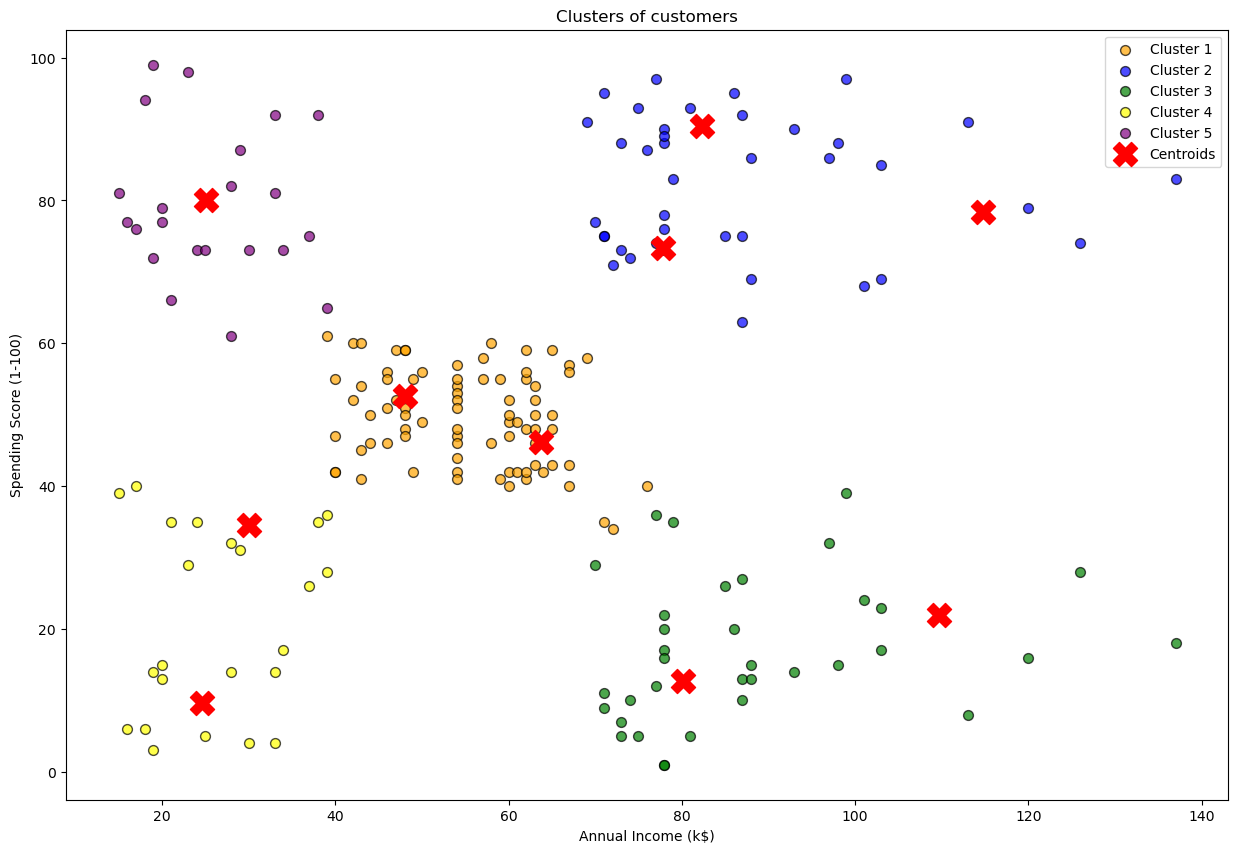

In [83]:

# Define colors for clusters
sombre_colors = ['orange', 'blue', 'green', 'yellow', 'purple']

# figure size
plt.figure(figsize=(15, 10))

# Visualizing all the clusters with somber colors
for cluster_idx in range(num_clusters):
    plt.scatter(
        X.loc[y_kmeans == cluster_idx, X.columns[0]], 
        X.loc[y_kmeans == cluster_idx, X.columns[1]], 
        s=50, alpha=0.7, c=sombre_colors[cluster_idx], 
        label=f'Cluster {cluster_idx + 1}', edgecolors='black', marker='o'
    )

# Plot centroids
plt.scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
    s=300, c='red', label='Centroids', marker='X'
)

# Set plot labels and title
plt.title('Clusters of customers')
plt.xlabel(X.columns[0])  
plt.ylabel(X.columns[1])  
plt.legend()

# Display the plot
plt.show()


# Model Interpretation

## Cluster Analysis

1. **Cluster 1 (Green):**
   - *Characteristic:* Earning high but spending less.
   - *Interpretation:* These individuals have a high income but are relatively conservative in their spending habits.

2. **Cluster 2 (Orange):**
   - *Characteristic:* Average in terms of earning and spending.
   - *Interpretation:* These individuals fall into the middle range for both income and spending, showing no extreme behavior.

3. **Cluster 3 (Blue):**
   - *Characteristic:* Earning high and also spending high [TARGET SET].
   - *Interpretation:* This cluster represents individuals with both high incomes and high spending. They are identified as the target set for special attention.

4. **Cluster 4 (Purple):**
   - *Characteristic:* Earning less but spending more.
   - *Interpretation:* Despite having a lower income, individuals in this cluster exhibit higher spending patterns.

5. **Cluster 5 (Yellow):**
   - *Characteristic:* Earning less, spending less.
   - *Interpretation:* Individuals in this cluster have lower incomes and are also conservative in their spending.

## Actionable Insights

- **Target Set (Cluster 3 - Blue):** Implement an alerting system. Send daily emails to this group with promotional content, as they are considered easier to convert.

- **Other Clusters (1, 2, 4, 5):** Target these individuals with special promotions to encourage spending through tailored marketing strategies.
